In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib notebook

Read data

In [2]:
from scipy.io import netcdf_file

# https://resources.marine.copernicus.eu/product-download/SEALEVEL_EUR_PHY_L4_MY_008_068
f = netcdf_file("data2.nc")
lat = f.variables['latitude'].data
long = f.variables['longitude'].data
vel_x = f.variables['ugos'].data.squeeze()
vel_y = f.variables['vgos'].data.squeeze()


# fill in missing values
from common_functions import interpolate_missing_point

#imputed_vel_x = interpolate_missing_point(vel_x, np.ma.masked_invalid(vel_x).mask)
#imputed_vel_y = interpolate_missing_point(vel_y, np.ma.masked_invalid(vel_y).mask)
imputed_vel_x = np.ma.masked_where(np.isnan(vel_x), vel_x)[60:82,10:40]
imputed_vel_y = np.ma.masked_where(np.isnan(vel_y), vel_y)[60:82,10:40]
lat = lat[60:82]
long = long[10:40]
long.min

<function ndarray.min>

In [3]:
print(lat[0],lat[-1])
print(long[0],long[-1])

27.4375 30.0625
-28.8125 -25.1875


## Compute the Okubo-Weiss parameter

<IPython.core.display.Javascript object>


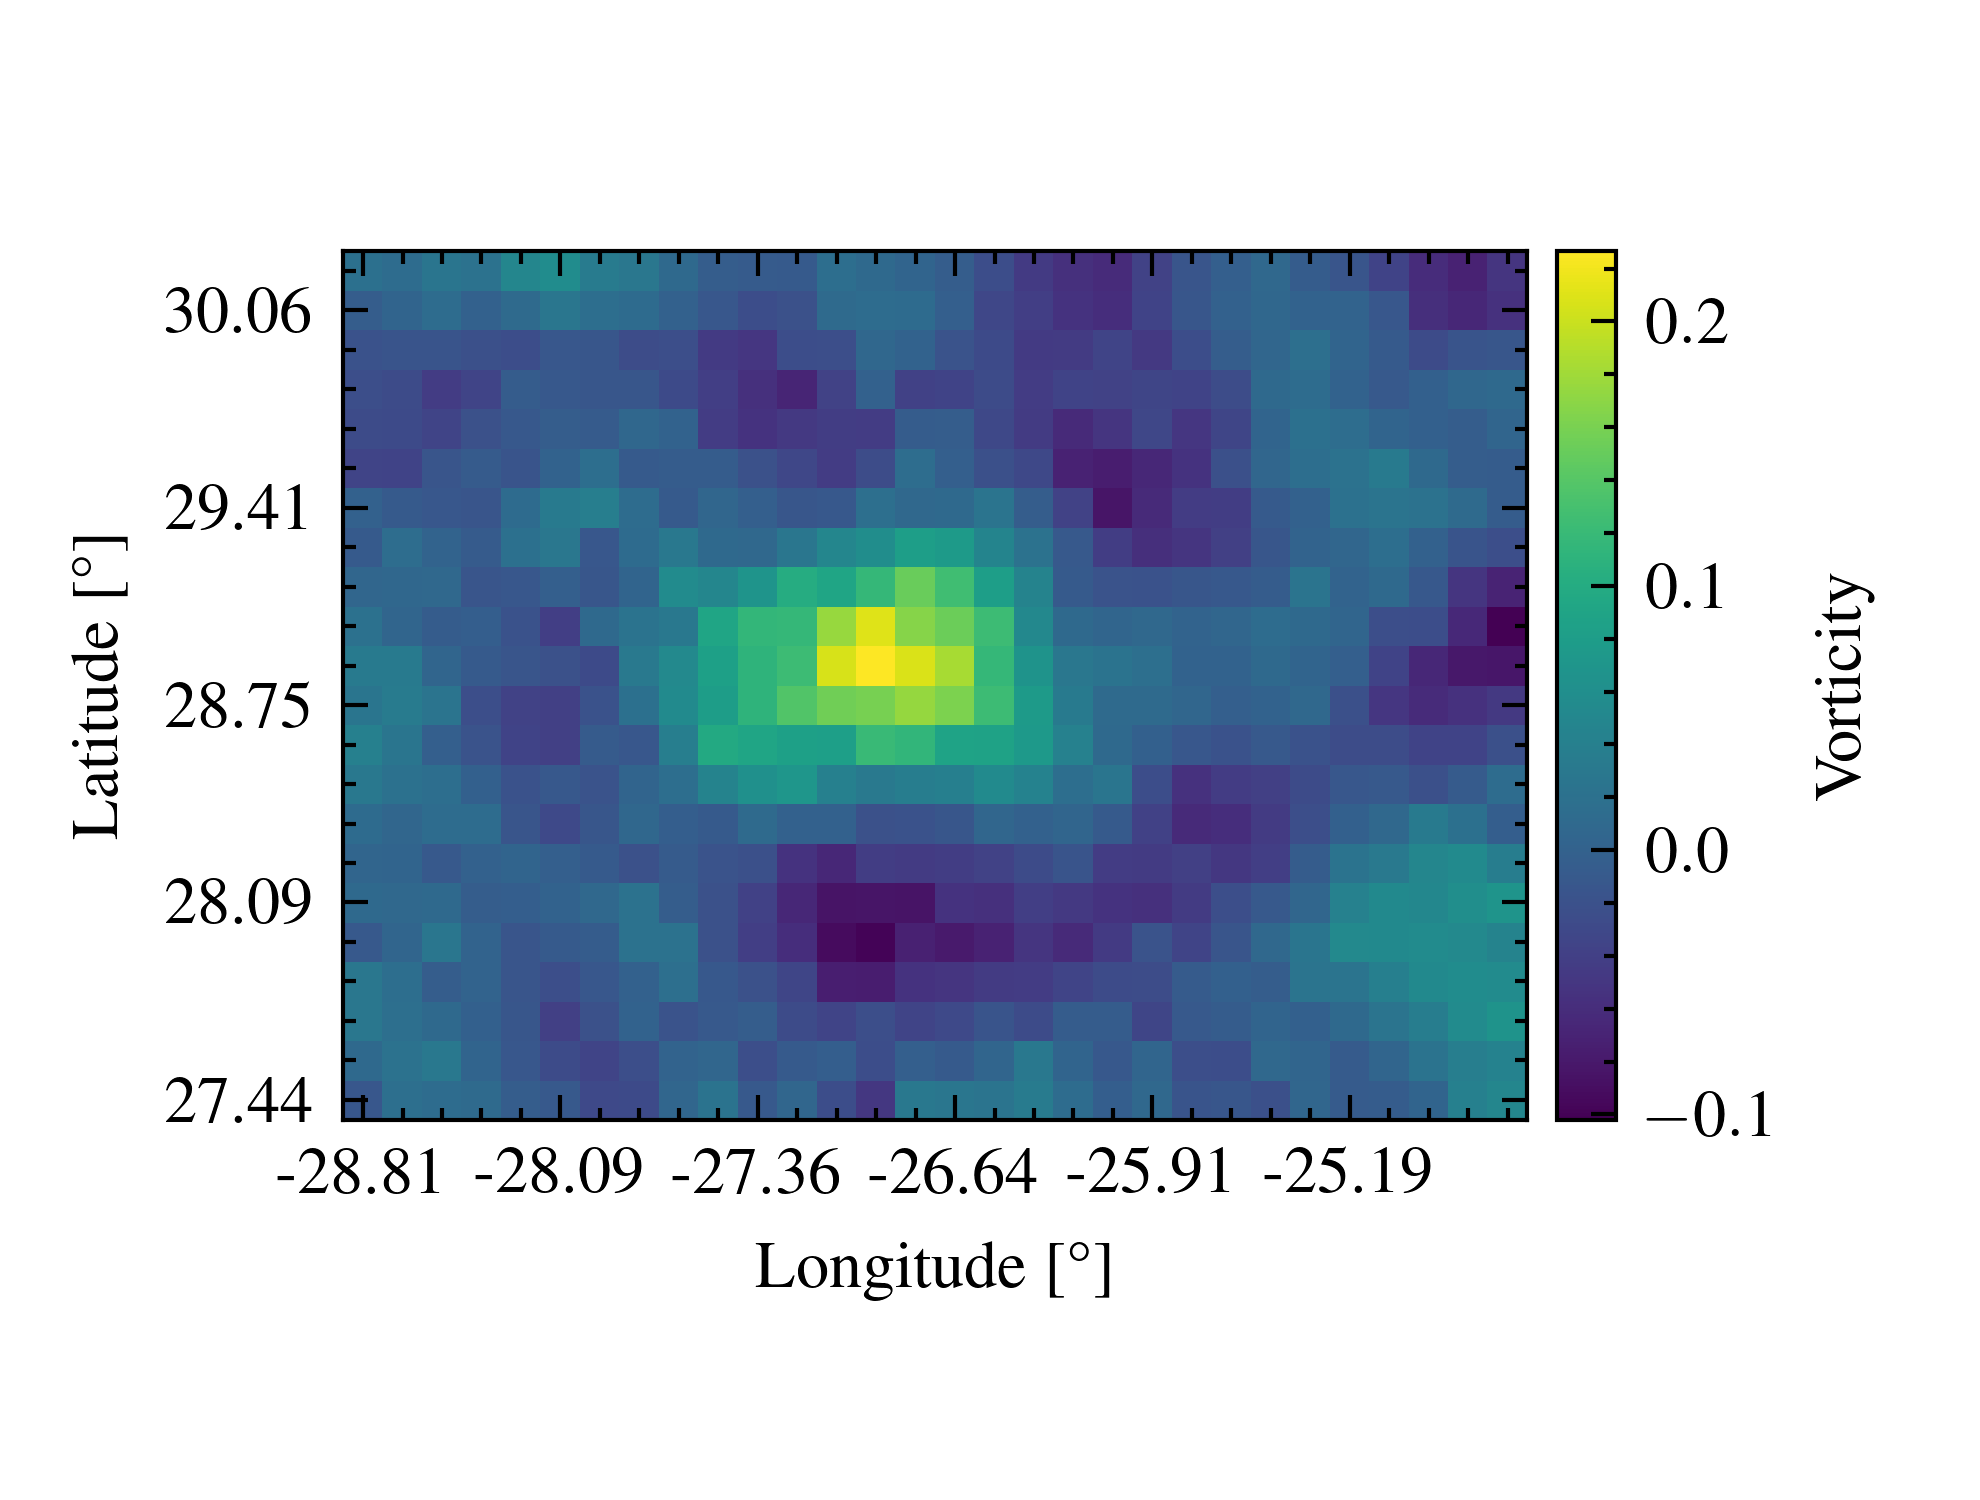

In [8]:
plt.style.use(['science','ieee'])
w = np.gradient(imputed_vel_y, axis=1) - np.gradient(imputed_vel_x, axis=0)
plt.figure()
im=plt.imshow(w, origin='lower')
plt.xlabel("Longitude [°]")
plt.ylabel("Latitude [°]")
current_xticks = plt.gca().get_xticks()[1:-1]
plt.xticks(current_xticks, np.around(np.linspace(long.min(),long.max(), len(current_xticks)), 2))
current_yticks = plt.gca().get_yticks()[1:-1]
plt.yticks(current_yticks, np.around(np.linspace(lat.min(),lat.max(), len(current_yticks)), 2))

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
   
cbar = plt.colorbar(im, cax=cax)
cbar.set_label("Vorticity")

plt.tight_layout()
plt.savefig("figures/vorticity.pdf",bbox_inches='tight')
plt.show()